<a href="_index.ipynb">&larr; DFT-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>

# Fourier-Reihe einer Rechteckschwingung #
Dieses Notebook demonstriert interaktive Widgets in Jupyter Notebooks am Beispiel der Fourierreihe einer Rechteckschwingung. 

Hierzu müssen ipywidgets und 

**Achtung:** Der interaktive Teil funktioniert z.Z. nur im "klassischen" Jupyter Notebook Interface, nicht mit JupyterLab.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

%matplotlib inline    
import matplotlib.pyplot as plt
from numpy import pi,sin,linspace,zeros,arange,cos
from ipywidgets import interact, interactive
from IPython.display import HTML, YouTubeVideo

#plt.style.use('seaborn-whitegrid') # ('classic')#('seaborn-dark')
#print(plt.style.available) # alle Matplotlib styles
import dsp_fpga_lib as dsp
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
plt.rcParams['figure.figsize'] = (10.0, 3.0) # Plotgröße in Inch
figsize = {"figsize": (12,5), "facecolor":"w"}

## Fourierreihe

Die Fourierreihe für eine symmetrische Rechteckschwingung mit Amplitude 1 und Periode $T$ ist

$$s(t) = \frac{4}{\pi} \sum^\infty_{k=1} \frac{\sin \left((2k -1)2\pi t / T\right)}{2k-1} $$

Im Folgenden wird die Reihe mit einer endlichen Anzahl $N$ Termen dargestellt.

In [2]:
def square_wave(N=3, T=5, n_points=200):
    """Berechne und plotte die Fourierreihe mit N Termen für eine Rechteckschwingung mit 
    Periode T und Amplitude 1."""
    t = linspace(-4*pi, 4*pi, n_points)
    s = zeros(n_points)
    for k in arange(1, N+1, 2): # start, stop (exklusive letztes Element), step
        s = s + (1./k * sin(2*pi*k*t/T))
    s = s * 4.0 / pi
    fig,ax = plt.subplots(**figsize)
    ax.plot(t, s)

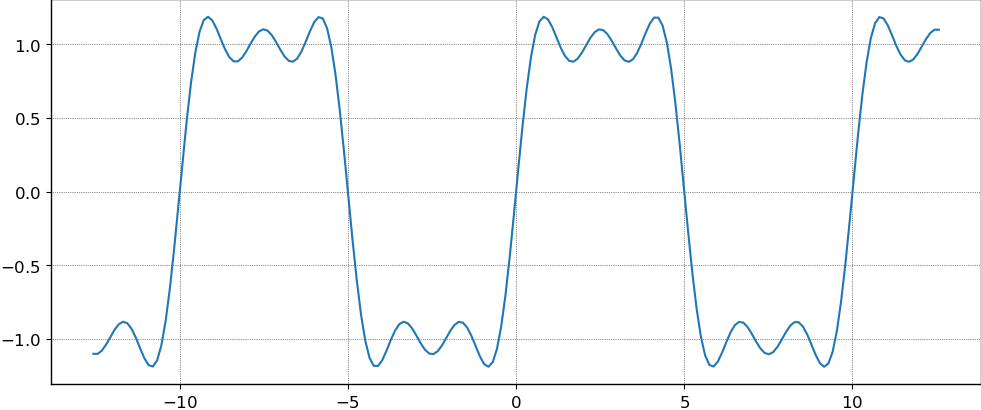

In [3]:
square_wave(N=5,T=10)

### Einfache interaktive Widgets ###
`interact()` generiert für jeden Parameter der übergebenen Funktion automatisch einen Slider. Wertebereich und Schrittweite können optional angegeben werden. Abhängig vom übergebenen Typ werden IntSlider, FloatSlider etc. erzeugt.

Jedesmal wenn ein Slider geändert wird, wird die Funktion `square_wave()` mit dem aktualisierten Parameter berechnet. Wird das Keyword Argument `continuous_update=False` gesetzt, erfolgt die Aktualisierung nur noch wenn die Maus losgelassen wird. 

Das Semikolon am Ende der Anweisung unterdrückt (wie immer bei Matplotlib Funktionen in Notebooks) Ausgaben der Funktion.

Mehr Informationen zu `interact()` unter
http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [4]:
iplt = interactive(square_wave, N=(1,50,2), T=(1., 50), n_points=(1, 500)); #, continuous_update=False
output = iplt.children[-1]
output.layout.height = '350px'
iplt

interactive(children=(IntSlider(value=3, description='N', max=50, min=1, step=2), FloatSlider(value=5.0, descr…

### Debugging ###
Tauchen keine interaktiven Widgets auf und wird im Terminal die Fehlermeldung 

`[IPKernelApp] ERROR | No such comm target registered: ipython.widget`

ausgegeben, sollte man die Pakete `ipywidgets` und u.U. `widgetsnbextension` nachinstallieren:

`pip install ipywidgets`

`pip install widgetsnbextension` (für das klassische Jupyter Notebook Interface) bzw.

`pip install jupyterlab_widgets` (für Jupyter 

Ggf. muss noch

`jupyter nbextension enable --py widgetsnbextension`

vom Terminal aus aktiviert werden (nur lokal bzw. für Betreuer, sudo Berechtigung erforderlich, siehe [Issue 541](https://github.com/jupyter-widgets/ipywidgets/issues/541)).


## Videos ##
Zusätzlich können Sie sich Videos zum Thema anschauen, z.B.

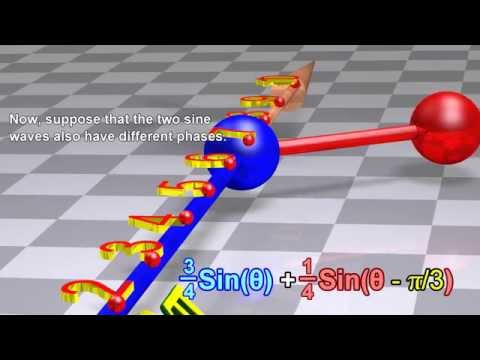

In [5]:
# Video "Fourier Transform, Fourier Series and Frequency Spectrum" von Eugene Khutoryansky
YouTubeVideo("r18Gi8lSkfM", start=0, autoplay=0, theme="light", color="red")# , width=800 , height=450)
# HTML('<iframe width="600" height="350" src="https://youtube.com/embed/r18Gi8lSkfM" </iframe>')

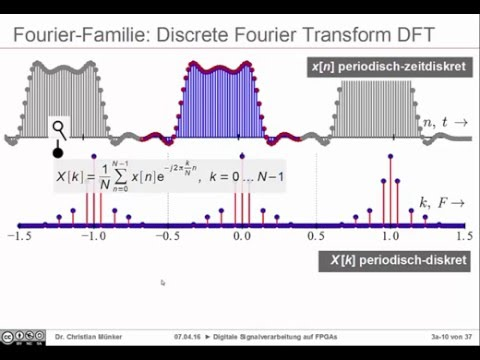

In [6]:
YouTubeVideo("zj26G_t45yQ") # Münker 3-1 DFT

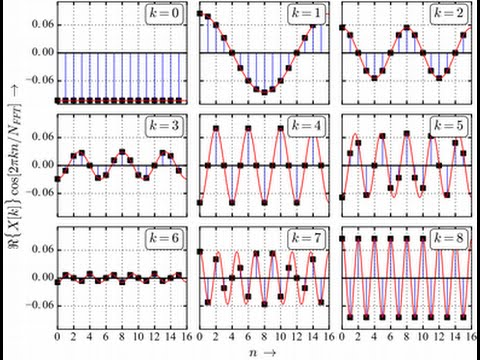

In [7]:
YouTubeVideo("9Nq228cF4nw") # Münker 3-2 DFT

### Experimente und Fragen

- Experimentieren Sie mit unterschiedlichen Frequenzen und DFT-Längen.

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digital Signal Processing"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2016 - 2021*.